In [1]:
import sys; sys.prefix

'/home/kyguy/anaconda3/envs/tfrmr'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocess import sentence_to_tokens

In [3]:
df = pd.read_csv("en_es_data.csv")

In [4]:
df.head()

,english,spanish
0,Go.,Ve.
1,Go.,Vete.
2,Go.,Vaya.
3,Go.,Váyase.
4,Hi.,Hola.


In [5]:
df.shape

(118964, 2)

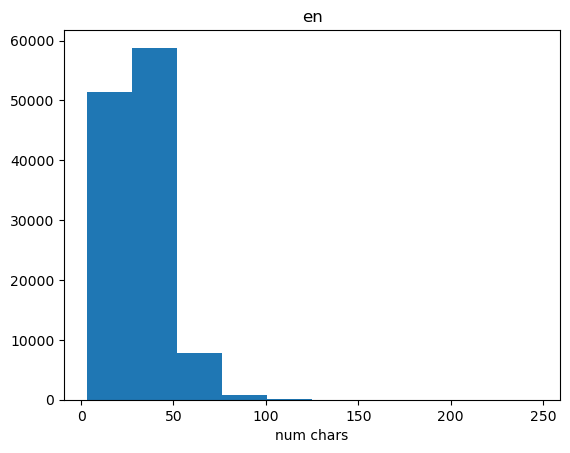

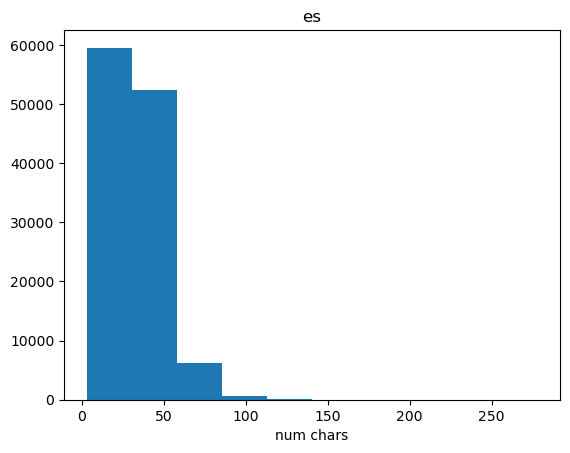

In [6]:
# look at num of chars in strings
df["en_len"] = df["english"].apply(lambda x: len(x))
df["es_len"] = df["spanish"].apply(lambda x: len(x))

plt.hist(df["en_len"])
plt.title("en")
plt.xlabel("num chars")
plt.show()

plt.hist(df["es_len"])
plt.title("es")
plt.xlabel("num chars")
plt.show()

In [7]:
# see preprocess.py for function definition
df["en_word_list"] = df["english"].apply(lambda sent: sentence_to_tokens(sent, "en"))
df["es_word_list"] = df["spanish"].apply(lambda sent: sentence_to_tokens(sent, "es"))

In [8]:
df

,english,spanish,en_len,es_len,en_word_list,es_word_list
0,Go.,Ve.,3,3,"[<s>, go, ., <e>]","[<s>, ve, ., <e>]"
1,Go.,Vete.,3,5,"[<s>, go, ., <e>]","[<s>, vete, ., <e>]"
2,Go.,Vaya.,3,5,"[<s>, go, ., <e>]","[<s>, vaya, ., <e>]"
3,Go.,Váyase.,3,7,"[<s>, go, ., <e>]","[<s>, váyase, ., <e>]"
4,Hi.,Hola.,3,5,"[<s>, hi, ., <e>]","[<s>, hola, ., <e>]"
...,...,...,...,...,...,...
118959,There are four main causes of alcohol-related ...,Hay cuatro causas principales de muertes relac...,192,243,"[<s>, there, are, four, main, causes, of, alco...","[<s>, hay, cuatro, causas, principales, de, mu..."
118960,There are mothers and fathers who will lie awa...,Hay madres y padres que se quedan despiertos d...,202,243,"[<s>, there, are, mothers, and, fathers, who, ...","[<s>, hay, madres, y, padres, que, se, quedan,..."
118961,A carbon footprint is the amount of carbon dio...,Una huella de carbono es la cantidad de contam...,205,238,"[<s>, a, carbon, footprint, is, the, amount, o...","[<s>, una, huella, de, carbono, es, la, cantid..."
118962,Since there are usually multiple websites on a...,Como suele haber varias páginas web sobre cual...,239,278,"[<s>, since, there, are, usually, multiple, we...","[<s>, como, suele, haber, varias, páginas, web..."


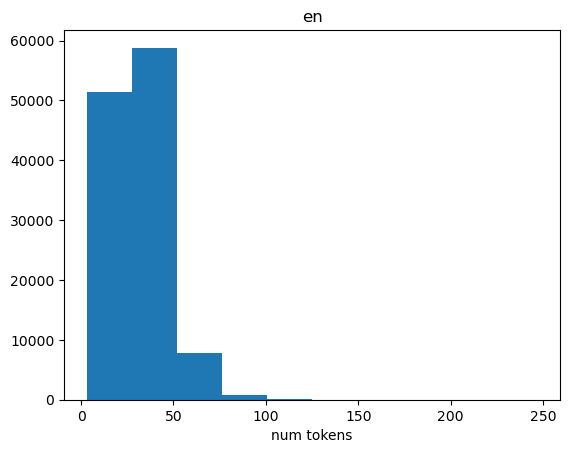

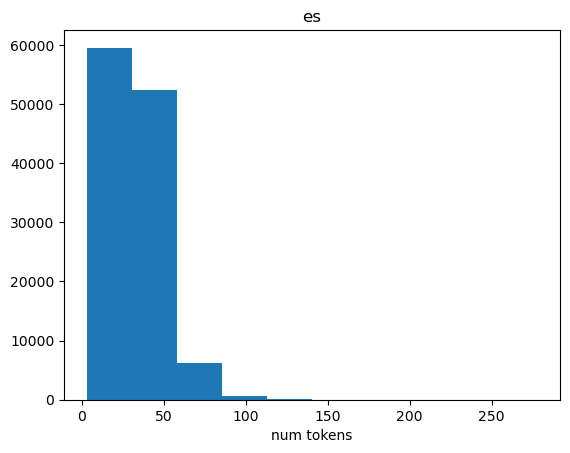

In [9]:
# count num of tokens in split strings
df["en_num_tokens"] = df["en_word_list"].apply(lambda x: len(x))
df["es_num_tokens"] = df["es_word_list"].apply(lambda x: len(x))

plt.hist(df["en_len"])
plt.title("en")
plt.xlabel("num tokens")
plt.show()

plt.hist(df["es_len"])
plt.title("es")
plt.xlabel("num tokens")
plt.show()

In [15]:
# let's look at strings w fewer tokens
# 10 tokens for en (excluding start and end token)
# 11 tokens for es because some punctuation is used twice
# this decision is arbitrary
short_df = df[(df["en_num_tokens"] < 13) & (df["es_num_tokens"] < 14)]

In [16]:
short_df.shape

(103569, 8)

In [17]:
short_df

,english,spanish,en_len,es_len,en_word_list,es_word_list,en_num_tokens,es_num_tokens
0,Go.,Ve.,3,3,"[<s>, go, ., <e>]","[<s>, ve, ., <e>]",4,4
1,Go.,Vete.,3,5,"[<s>, go, ., <e>]","[<s>, vete, ., <e>]",4,4
2,Go.,Vaya.,3,5,"[<s>, go, ., <e>]","[<s>, vaya, ., <e>]",4,4
3,Go.,Váyase.,3,7,"[<s>, go, ., <e>]","[<s>, váyase, ., <e>]",4,4
4,Hi.,Hola.,3,5,"[<s>, hi, ., <e>]","[<s>, hola, ., <e>]",4,4
...,...,...,...,...,...,...,...,...
116644,Electronic components can be cleaned using pur...,Los componentes electrónicos pueden ser limpia...,66,83,"[<s>, electronic, components, can, be, cleaned...","[<s>, los, componentes, electrónicos, pueden, ...",12,13
116738,The government watched the activities of radic...,El gobierno vigilaba atentamente las actividad...,66,69,"[<s>, the, government, watched, the, activitie...","[<s>, el, gobierno, vigilaba, atentamente, las...",12,12
116895,Japanese companies generally provide their emp...,Las compañías japonesas normalmente les dan un...,67,73,"[<s>, japanese, companies, generally, provide,...","[<s>, las, compañías, japonesas, normalmente, ...",11,13
116910,Rich mineral deposits have been discovered rec...,Recientemente se han descubierto depósitos ric...,67,76,"[<s>, rich, mineral, deposits, have, been, dis...","[<s>, recientemente, se, han, descubierto, dep...",12,13


In [18]:
short_df[:10]

,english,spanish,en_len,es_len,en_word_list,es_word_list,en_num_tokens,es_num_tokens
0,Go.,Ve.,3,3,"[<s>, go, ., <e>]","[<s>, ve, ., <e>]",4,4
1,Go.,Vete.,3,5,"[<s>, go, ., <e>]","[<s>, vete, ., <e>]",4,4
2,Go.,Vaya.,3,5,"[<s>, go, ., <e>]","[<s>, vaya, ., <e>]",4,4
3,Go.,Váyase.,3,7,"[<s>, go, ., <e>]","[<s>, váyase, ., <e>]",4,4
4,Hi.,Hola.,3,5,"[<s>, hi, ., <e>]","[<s>, hola, ., <e>]",4,4
5,Run!,¡Corre!,4,7,"[<s>, run, !, <e>]","[<s>, ¡, corre, !, <e>]",4,5
6,Run.,Corred.,4,7,"[<s>, run, ., <e>]","[<s>, corred, ., <e>]",4,4
7,Who?,¿Quién?,4,7,"[<s>, who, ?, <e>]","[<s>, ¿, quién, ?, <e>]",4,5
8,Fire!,¡Fuego!,5,7,"[<s>, fire, !, <e>]","[<s>, ¡, fuego, !, <e>]",4,5
9,Fire!,¡Incendio!,5,10,"[<s>, fire, !, <e>]","[<s>, ¡, incendio, !, <e>]",4,5


In [20]:
short_df[-10:]

,english,spanish,en_len,es_len,en_word_list,es_word_list,en_num_tokens,es_num_tokens
116329,Thousands of candles illuminated the church du...,Miles de velas iluminaban la iglesia durante l...,64,58,"[<s>, thousands, of, candles, illuminated, the...","[<s>, miles, de, velas, iluminaban, la, iglesi...",12,12
116343,Tom doesn't know the difference between astron...,Tom no sabe la diferencia entre astronomía y a...,64,56,"[<s>, tom, doesn't, know, the, difference, bet...","[<s>, tom, no, sabe, la, diferencia, entre, as...",12,12
116359,Tom sometimes has trouble understanding other ...,Tom a veces tiene dificultad para comprender l...,64,69,"[<s>, tom, sometimes, has, trouble, understand...","[<s>, tom, a, veces, tiene, dificultad, para, ...",11,13
116504,Many mistakes could have been avoided through ...,Muchos errores se podrían evitar con expermien...,65,60,"[<s>, many, mistakes, could, have, been, avoid...","[<s>, muchos, errores, se, podrían, evitar, co...",12,11
116518,Polish archaeologists are conducting scientifi...,Arqueólogos polacos están conduciendo investig...,65,75,"[<s>, polish, archaeologists, are, conducting,...","[<s>, arqueólogos, polacos, están, conduciendo...",11,11
116644,Electronic components can be cleaned using pur...,Los componentes electrónicos pueden ser limpia...,66,83,"[<s>, electronic, components, can, be, cleaned...","[<s>, los, componentes, electrónicos, pueden, ...",12,13
116738,The government watched the activities of radic...,El gobierno vigilaba atentamente las actividad...,66,69,"[<s>, the, government, watched, the, activitie...","[<s>, el, gobierno, vigilaba, atentamente, las...",12,12
116895,Japanese companies generally provide their emp...,Las compañías japonesas normalmente les dan un...,67,73,"[<s>, japanese, companies, generally, provide,...","[<s>, las, compañías, japonesas, normalmente, ...",11,13
116910,Rich mineral deposits have been discovered rec...,Recientemente se han descubierto depósitos ric...,67,76,"[<s>, rich, mineral, deposits, have, been, dis...","[<s>, recientemente, se, han, descubierto, dep...",12,13
117563,Civilization is the limitless multiplication o...,La civilización es la ilimitada multiplicación...,72,75,"[<s>, civilization, is, the, limitless, multip...","[<s>, la, civilización, es, la, ilimitada, mul...",11,12


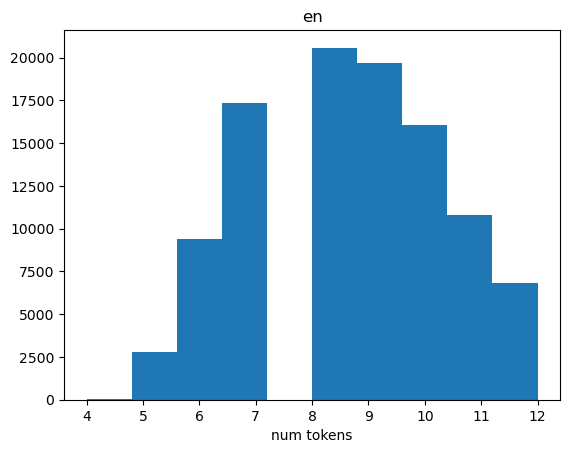

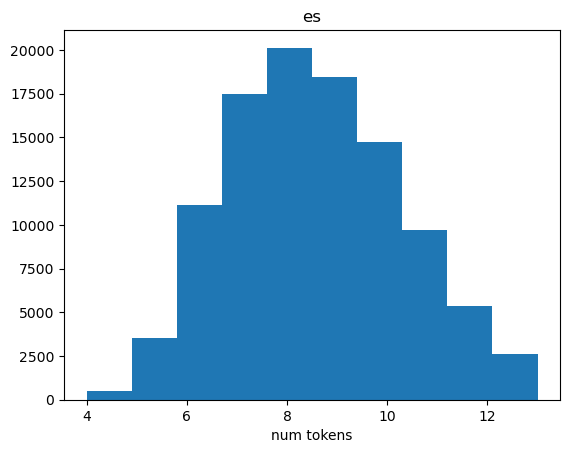

In [19]:
# distribution of num tokens in the subset of data w fewer tokens
plt.hist(short_df["en_num_tokens"])
plt.title("en")
plt.xlabel("num tokens")
plt.show()

plt.hist(short_df["es_num_tokens"])
plt.title("es")
plt.xlabel("num tokens")
plt.show()